Data Description:
This Study will use the IBM HR analytics Employee attrition and performance data set to apply machine learning Technique to 
dive into and find the insights of the data. This dataset is from the kaggle and it is a functional data set created by IBM.
for purpose of created this data set by the IBM Data scientist is to predict the employee attrition. In the dataset total
number of variables is 35 in which 1 is traget variable and rest 34 are predicting variables. There are 1470 are obseravtions.
The target variable contains only two values yes or no. Here 1233 are no and 237 are yes. so it is imbalance dataset and this 
thing i will show you by EDA and rest also (like as missing values.)

Let's Start:

In [ ]:
#Load basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading the data
url='E:\\Project\\IBM HR Analyst\\WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [ ]:
#Read the data
data=pd.read_csv(url, header=0, sep=',')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Size of data set
data.shape

(1470, 35)

In [ ]:
data_corr=data.corr()
data_corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [ ]:
#Missing values check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#Check the structure of dataset
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#check the data description
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#find the number of unique values and arrange those in increasing order
Nunique = data.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

##### Exploratory Data Analysis(EDA)

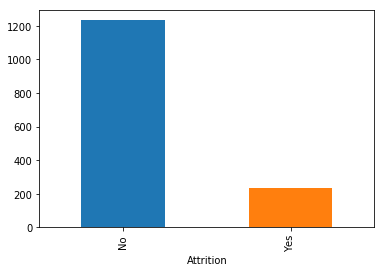

In [ ]:
data.groupby('Attrition')['Attrition'].agg('count').plot.bar();

As we can see, the dataset is quite heavily imbalanced.

Data Visualization:
We are using Seaborn library for Data visualization. Seaborn is a library for making attractive and informative 
statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, 
including support for numpy and pandas data structures and statistical routines from scipy and statsmodels. Since there are 3 types of data in this dataset , such as continuous , categorical and ordinal features. for exploring all kinds of features and the relationship within features we will descuss with the visualization.



Data cleaning: 
Among all the 35 variables in the data set, there are 4 features that are not useful,they are "EmployeeCount", "EmployeeNumber", "Over18", "StandardHours". Therefore, we can remove these 4 variables.

##### Histograms for Continuous Features

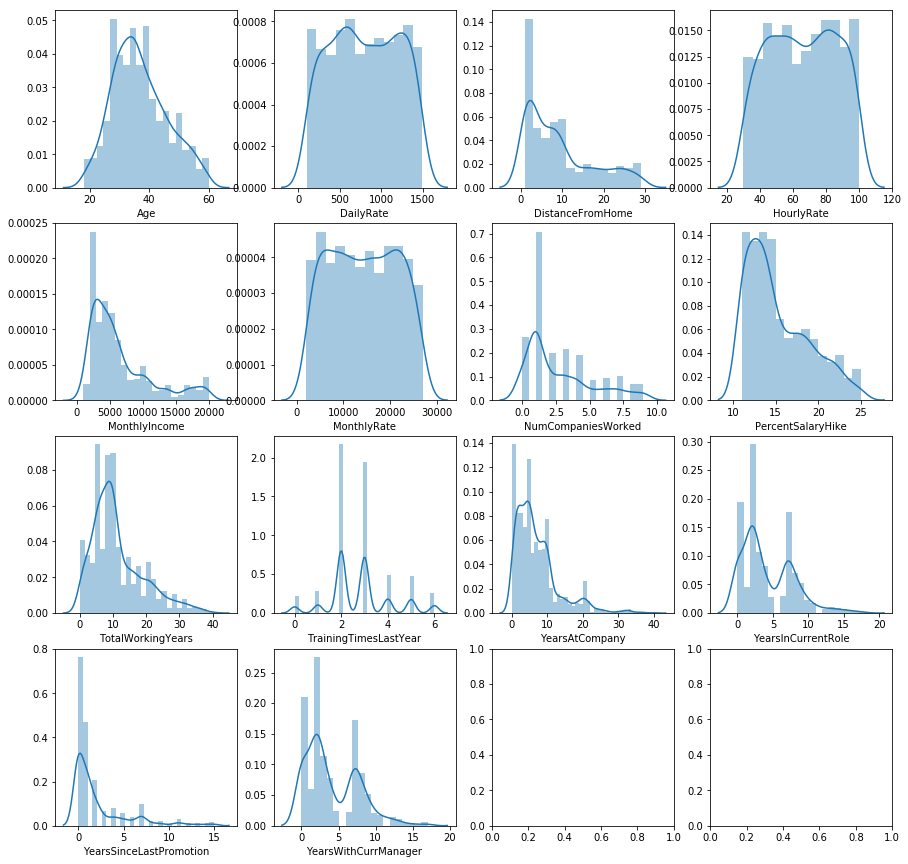

In [ ]:
#Display Multiple Distribution Plots. Histograms for Continuous Features
fig,ax = plt.subplots(4,4, figsize=(15,15))  # 'ax' has references to all the four axes
sns.distplot(data['Age'], ax = ax[0,0]) 
sns.distplot(data['DailyRate'], ax = ax[0,1])
sns.distplot(data['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(data['HourlyRate'], ax = ax[0,3])
sns.distplot(data['MonthlyIncome'], ax = ax[1,0])
sns.distplot(data['MonthlyRate'], ax = ax[1,1])
sns.distplot(data['NumCompaniesWorked'], ax = ax[1,2])
sns.distplot(data['PercentSalaryHike'], ax = ax[1,3])
sns.distplot(data['TotalWorkingYears'], ax = ax[2,0])
sns.distplot(data['TrainingTimesLastYear'], ax = ax[2,1])
sns.distplot(data['YearsAtCompany'], ax = ax[2,2])
sns.distplot(data['YearsInCurrentRole'], ax = ax[2,3])
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(data['YearsWithCurrManager'], ax = ax[3,1])

plt.show()

From the above plot, we can able to get a rough idea of the employees from this dataset.
For example, what is the avaerage age of the employees and average income of the employees.

##### Now i am going to draw box plot of continues features w.r.t attritation 

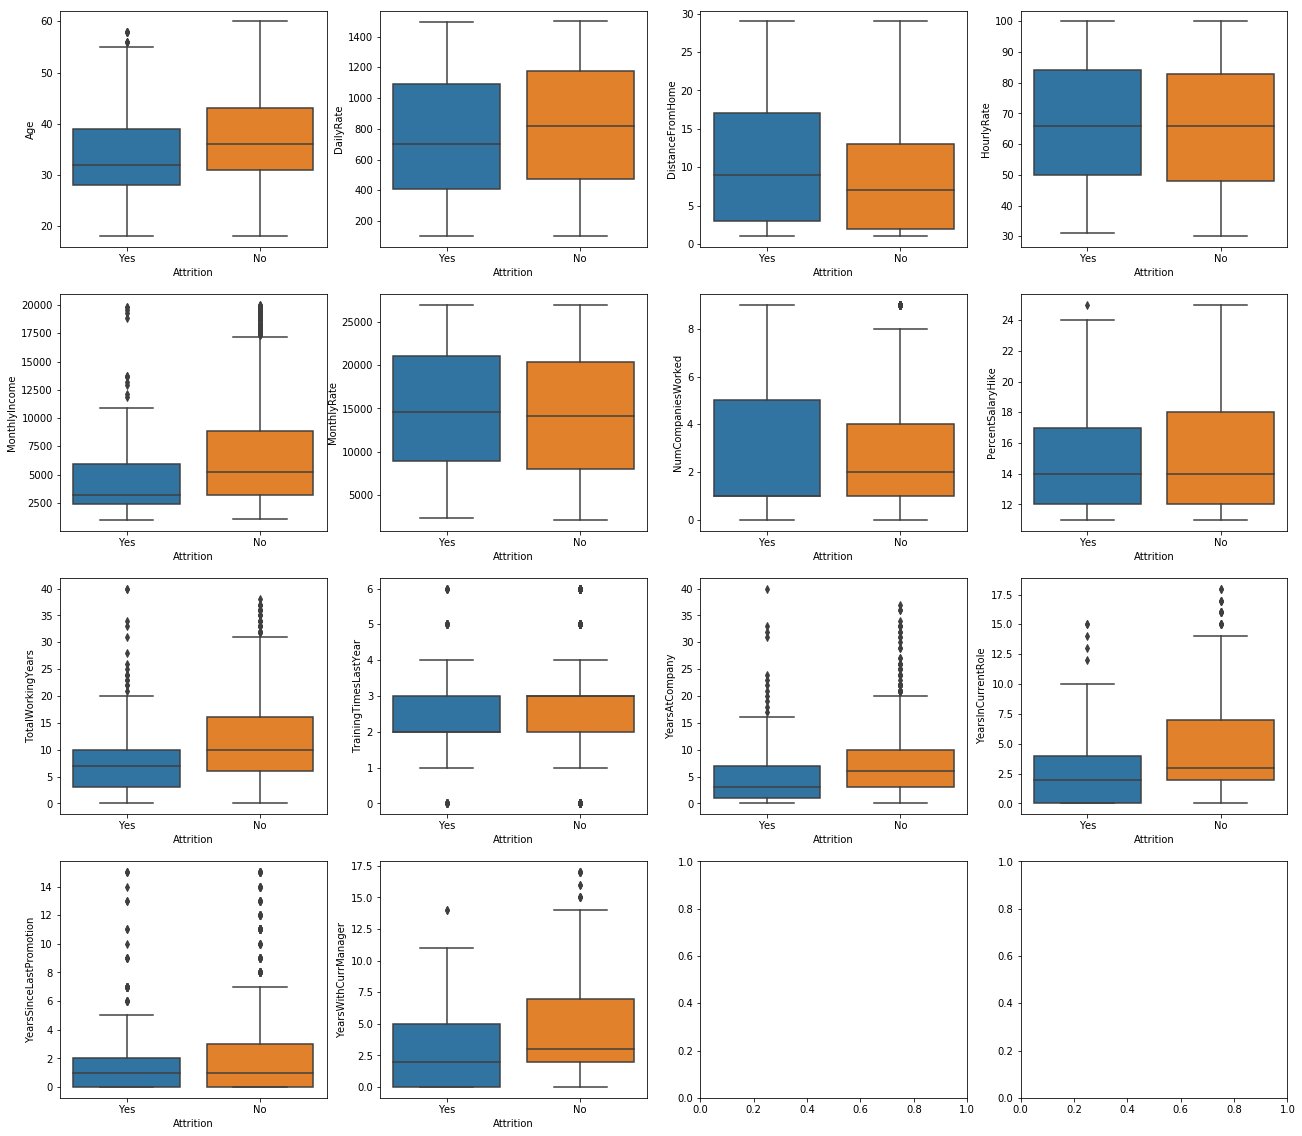

In [ ]:
fig,ax = plt.subplots(4,4, figsize=(22,20))     # 'ax' has references to all the four axes
sns.boxplot(data['Attrition'], data['Age'], ax = ax[0,0])  # Plot on 1st axes 
sns.boxplot(data['Attrition'], data['DailyRate'], ax = ax[0,1])  # Plot on IInd axes
sns.boxplot(data['Attrition'], data['DistanceFromHome'], ax = ax[0,2])
sns.boxplot(data['Attrition'], data['HourlyRate'], ax = ax[0,3])
sns.boxplot(data['Attrition'], data['MonthlyIncome'], ax = ax[1,0])  
sns.boxplot(data['Attrition'], data['MonthlyRate'], ax = ax[1,1])  
sns.boxplot(data['Attrition'], data['NumCompaniesWorked'], ax = ax[1,2]) 
sns.boxplot(data['Attrition'], data['PercentSalaryHike'], ax = ax[1,3]) 
sns.boxplot(data['Attrition'], data['TotalWorkingYears'], ax = ax[2,0])
sns.boxplot(data['Attrition'], data['TrainingTimesLastYear'], ax = ax[2,1])
sns.boxplot(data['Attrition'], data['YearsAtCompany'], ax = ax[2,2])   
sns.boxplot(data['Attrition'], data['YearsInCurrentRole'], ax = ax[2,3])
sns.boxplot(data['Attrition'], data['YearsSinceLastPromotion'], ax = ax[3,0])
sns.boxplot(data['Attrition'], data['YearsWithCurrManager'], ax = ax[3,1]);

We can see from these plots that the average age of the employees who leave is younger than the employees who choose to stay,
which means that younger people are more likely to change jobs. And employees who leave mostly has a lower monthly income as 
well daily rate than employees who stay.For some other features such as “TotalWorkingYears”,“YearsAtCompany”,“YearsCurrentRole”
and “YearsWithCurrManager”, they all shows that employees who stay and work for the company for a shorter time are more likely 
to leave the company, while employees who work longer for the company are less likely to leave.

##### Bar Plots for Categorical Features

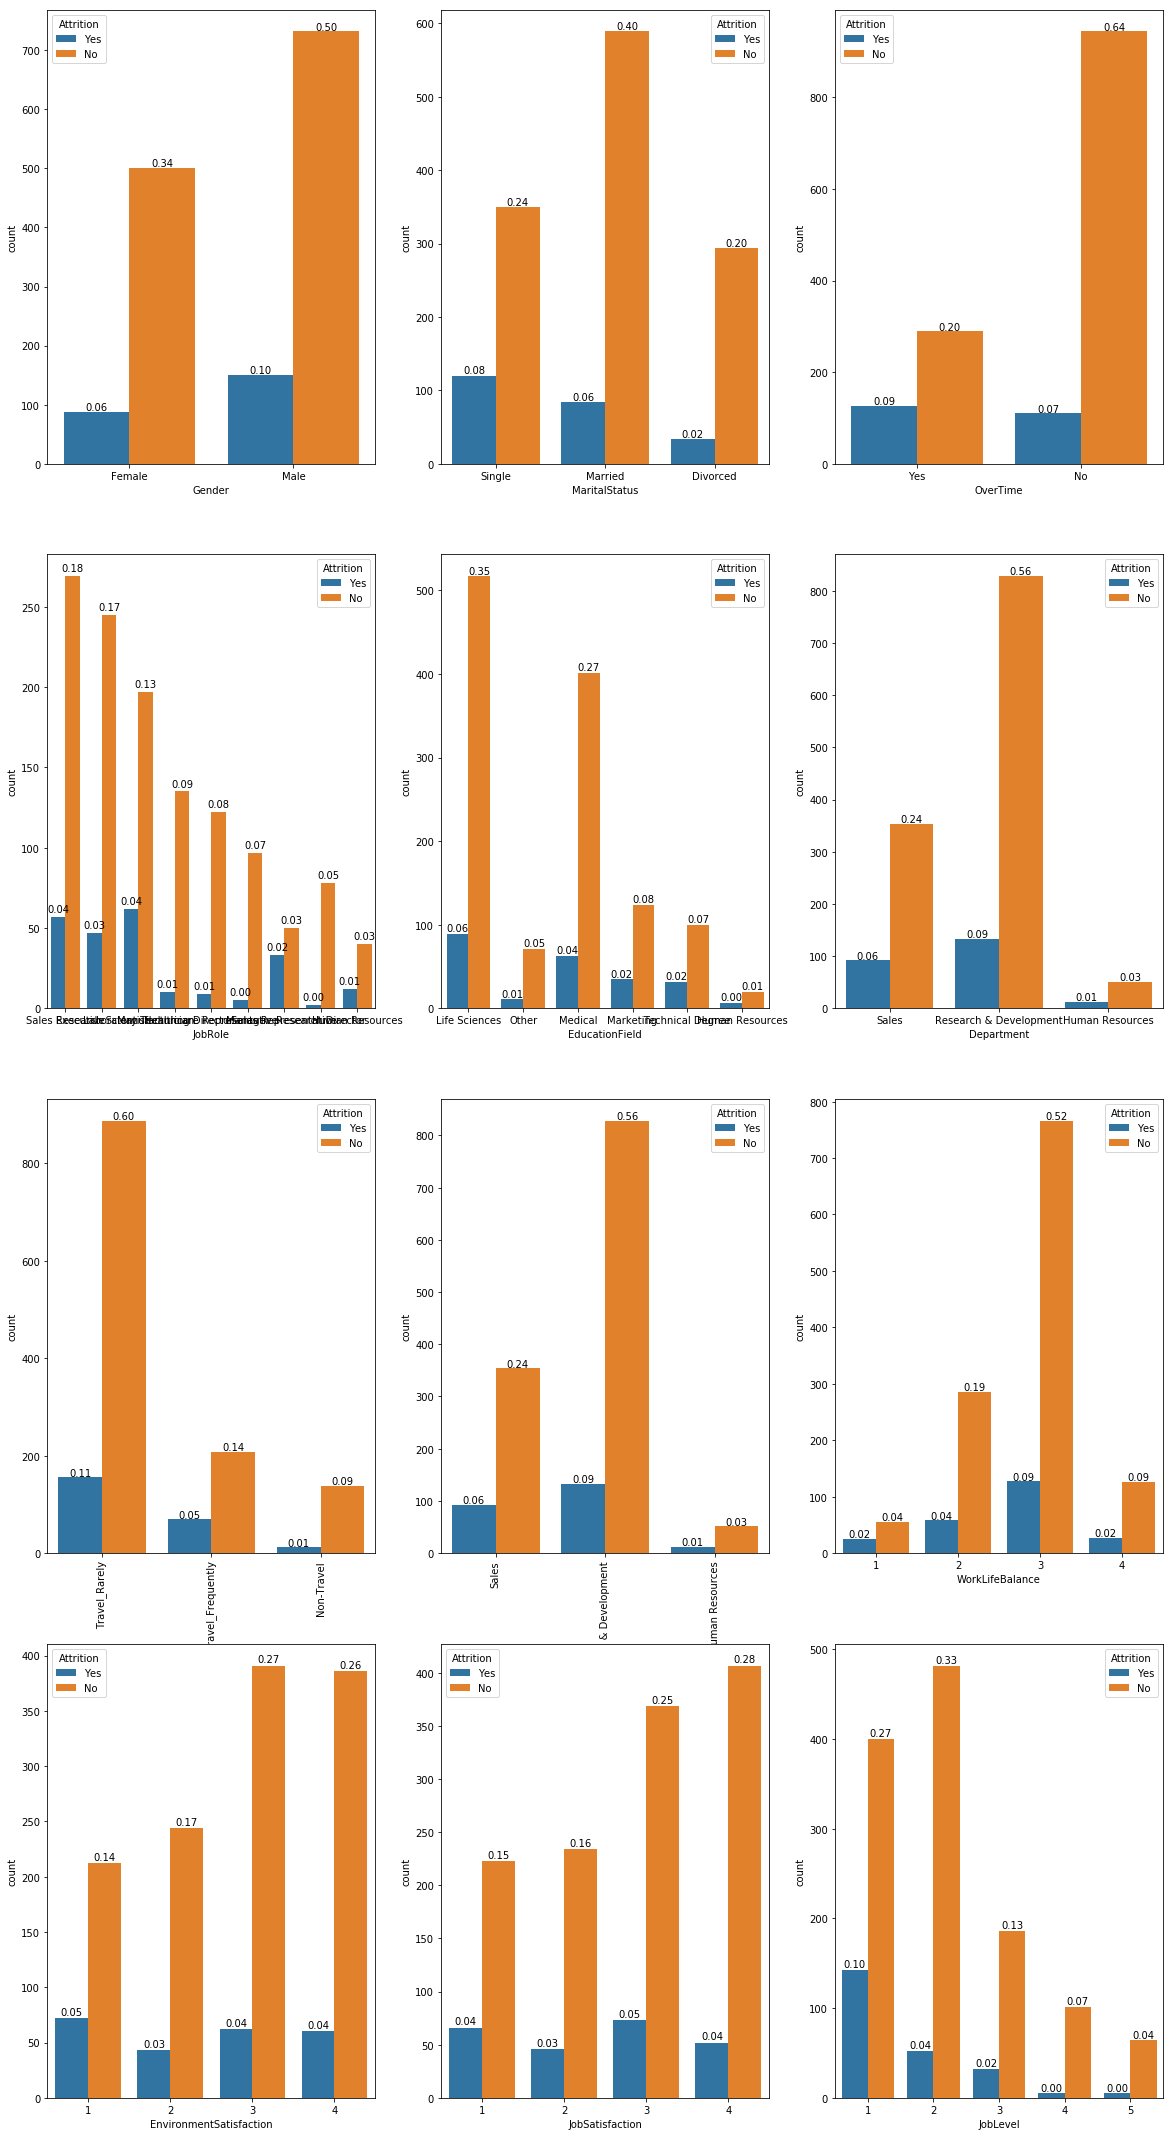

In [ ]:
#Multiple Count Plots
total_records= len(data)
columns = ["Gender","MaritalStatus","OverTime","JobRole","EducationField","Department","BusinessTravel","Department",
           "WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction","JobLevel"]
plt.figure(figsize=(20,10))
j=0
for i in columns:
    j +=1
    plt.subplot(4,3,j)
    #sns.countplot(data[i])
    ax1 = sns.countplot(data=data,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total_records,0),ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

Observation of above Count Plot Graph
High attrition rate in given attribute

1) Single attrition rate is 50% in marital status.
2) Job Level -1 attrition rate is also high comapre to other job levels
3) EnvironmentSatisfaction Level 1 has high attrition rate.
4) Attrition raltes are high in these attribute Sales Deparment, Male,Jobsatisfaction 1

Bar plots of categorical and numerical. 
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against.it. Default Conf. interval = 0.95

In order to get an idea, on what factors an employees attrition depends, lets do some bar plots, where we will plot the factors on the x and the average attrition rate for that factor on the y axis.

From the plots,we can see that for the employees who travel a lot have a higher attrition rate, and for the employees who 
have overtime also have a higher attrition rate. Besides this, we can find that for different job roles, sales representative 
has a very high attrition rate. The “JobRole over Attrition” bar plot shows that for the sales role, there are about 40% of 
the sales representatives leave the company.

### Swarm Plot

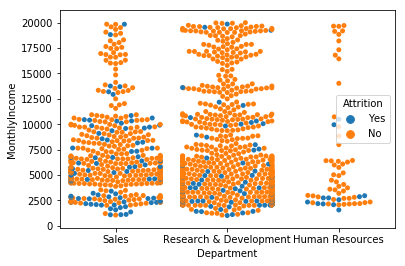

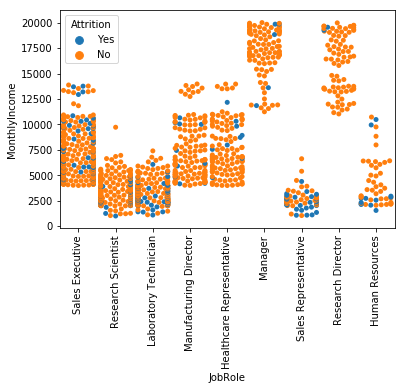

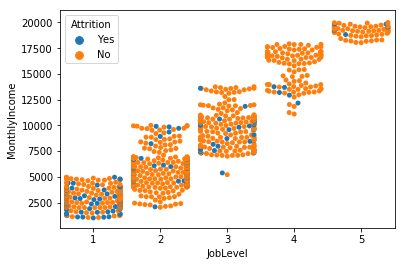

In [ ]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=data);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=data);
plt.xticks( rotation=90 )
plt.show()

sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=data);
plt.show()

### Factor Plot

C:\Users\user\Anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


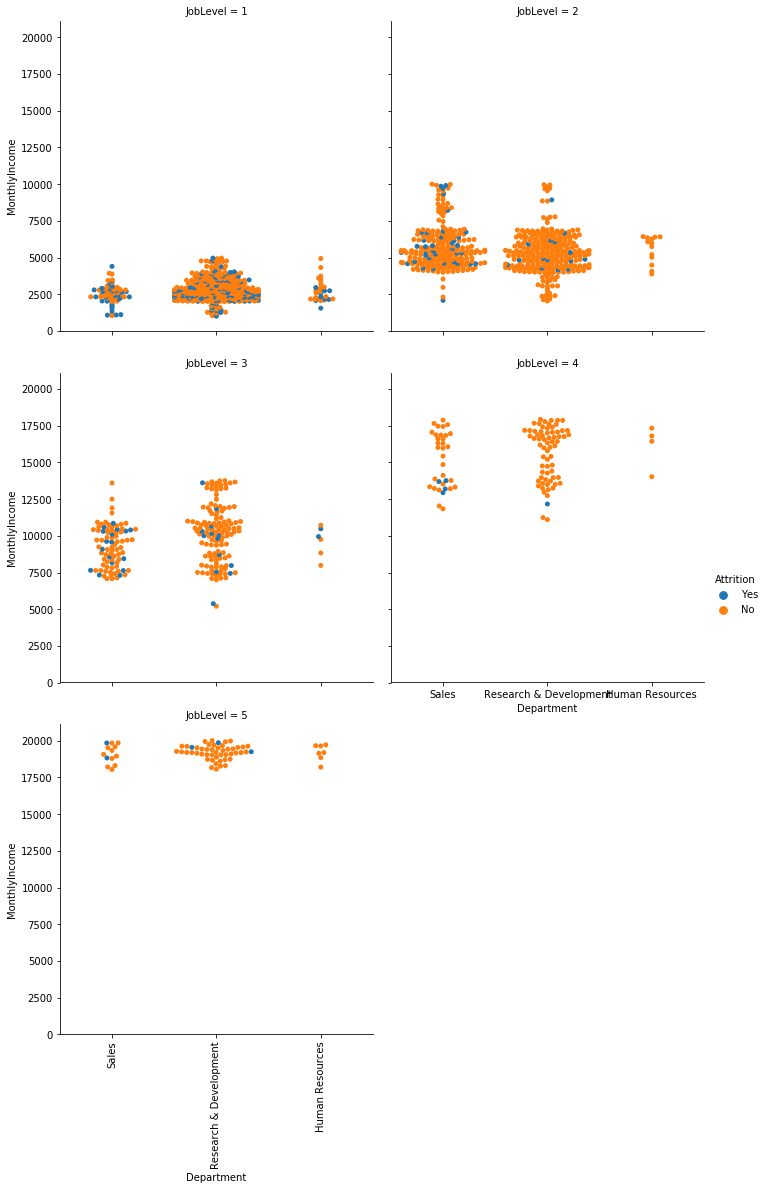

In [ ]:
sns.factorplot(x =   'Department',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'Attrition',    # Categorical
               col = 'JobLevel',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'swarm',
               data = data)
plt.xticks( rotation=90 )
plt.show()

### Observations from above graphical representations:
Attrition rate is high in JobLevel 1 at low level salary(Between -10% and +10 % of 2500) after that in JobLevel-2 and LobLvel-3 at salary range between 7500 to 10000).
Attrition rate is high in Sales and Research & Development Departments. especially in JobLevel-1 both the departments.
Conclusion : High Attrition rates are in Sales Representive(JobLevel- 1 & Who are single ),Laboratory Technician (JobLevel - 1), Sales Executive (JobLevel-3 ,JobLevel 2 and who has salary range of 7500 and 10000)

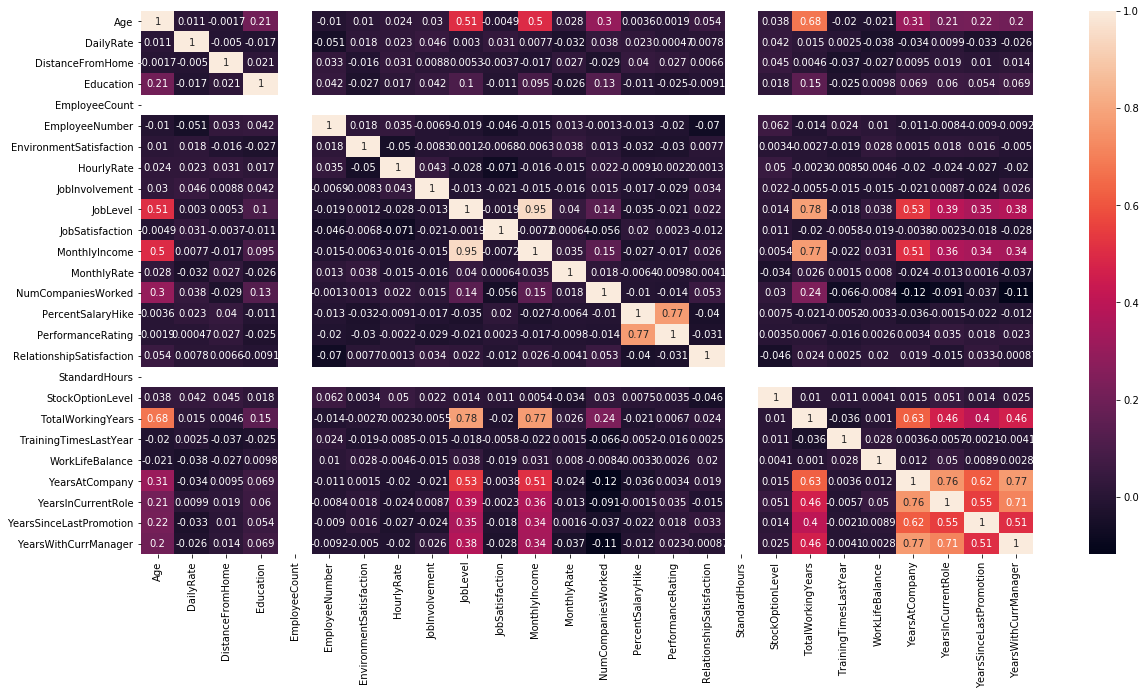

In [ ]:
# check correlation with heat map
#Correlation Heatmap of HR Data(Numerical variables)
plt.figure(figsize=(20,10))
heatmap_data=sns.heatmap(data_corr, annot=True)

After taking a thorough overview on all the features, I performed the correlation analysis for all the numerical features including continuous features and ordinal features. From the above correlation plot, I found there were several features have strong positive correlation relationships. The strongest positive correlation relationship is between the “JobLevel” and “MonthlyIncome”, which means that a higher job level will have more monthly income. Besides this, “MonthlyIncome” is also strongly correlated with “Age”, “TotalWorkingYears” and features	related to years stay in company.

employee’s age, monthly income, overtime, years staying at company, working environment and job satisfaction and job role regarding to sales are very likely to influence whether an employee will leave or stay.

In [ ]:
#Let's remove the strongly correlated variables
new_data =data[['Age','DailyRate','DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel',
                       'JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']].copy()
new_data.head()
#new data contains less corelated data

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [ ]:
#categorical variable data
data_cat = data[['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
                 'Over18', 'OverTime']].copy()
data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
#replace Yes and No in Attrition with 1 and 0
Num_val = {'Yes':1, 'No':0}
data_cat['Attrition'] = data_cat["Attrition"].apply(lambda x: Num_val[x])
data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
#Now replace other categorical variables with dummy values.
data_cat=pd.get_dummies(data_cat)
data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
data_final=pd.concat([new_data, data_cat], axis=1)

In [ ]:
data_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,3,61,2,2,2,4,1,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,4,92,2,1,3,2,0,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,40,3,1,2,4,1,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
# apply train and test for this data set 
#since it having no missing value 
#model Building by Random forest classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x=data_final.drop(columns='Attrition', axis=1)
y=data_final['Attrition']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=100)

#### Applying Decision Tree

In [ ]:
entropy=DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)

In [ ]:
entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
y_pred=entropy.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print ("accuracy is:",accuracy_score(y_test,y_pred)*100)

accuracy is: 84.35374149659864


#### Applying KNN on this dataset 
findout the minimum Kvalue at which maximum accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for K in range(1,100):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    y_pred = neigh.predict(x_test)
    print( "Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  82.99319727891157 % for K-Value: 2
Accuracy is  80.27210884353741 % for K-Value: 3
Accuracy is  84.01360544217688 % for K-Value: 4
Accuracy is  83.6734693877551 % for K-Value: 5
Accuracy is  84.18367346938776 % for K-Value: 6
Accuracy is  84.35374149659864 % for K-Value: 7
Accuracy is  84.01360544217688 % for K-Value: 8
Accuracy is  84.01360544217688 % for K-Value: 9
Accuracy is  84.18367346938776 % for K-Value: 10
Accuracy is  84.18367346938776 % for K-Value: 11
Accuracy is  84.18367346938776 % for K-Value: 12
Accuracy is  84.18367346938776 % for K-Value: 13
Accuracy is  84.18367346938776 % for K-Value: 14
Accuracy is  84.18367346938776 % for K-Value: 15
Accuracy is  84.18367346938776 % for K-Value: 16
Accuracy is  84.18367346938776 % for K-Value: 17
Accuracy is  84.18367346938776 % for K-Value: 18
Accuracy is  84.18367346938776 % for K-Value: 19
Accuracy is  84.18367346938776 % for K-Value: 20
Accuracy is  84.18367346938776 % for K-Value: 21
Accuracy is  84.1836734693877

since at K=4 we get 84.01360544217688%  and at K=7 we get 84.35374149659864% accuracy.There is slightly change in the accuracy but change is k higer in this case i am going to consider k value is 4

#### Apply Random Forest

In [ ]:
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#predict the result of test
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
#test accuracy
print ('accuracy score is ', accuracy_score(y_test, pred)*100)

accuracy score is  86.73469387755102


The random forest works quite well even with the default parameters. That’s one of reason we used RF for this problem.Though this can be improved by tuning hyper parameters of Random Forest classifier. Random forest also doesn’t over fit easily because of its randomness feature.

One of the best feature Random forest model has- it provides the importance of variables/features in the data/model. For this HR Analytics problem, we are interested in knowing which feature/factor contribute the most in the Attrition and RF’s one function can give us this information. This is just another reason why we have used RF.